In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [47]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [48]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [49]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [50]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


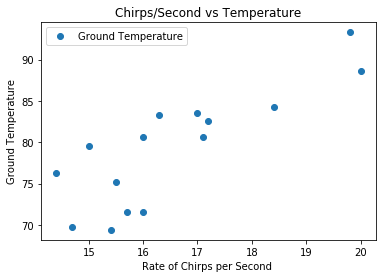

In [51]:
df.plot(x = 'Chirps/Second', y = 'Ground Temperature',style = 'o')
plt.title('Chirps/Second vs Temperature')
plt.xlabel('Rate of Chirps per Second ')
plt.ylabel('Ground Temperature')
plt.show()

In [52]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [53]:
x = df[['Ground Temperature']].values
y = df['Chirps/Second']

# Task 1

Have not split because of less data and haven't performed scaling either

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print('Coefficient :',model.coef_,'\nIntercept :',model.intercept_)

Coefficient : [0.20299973] 
Intercept : 0.4593146452359562


In [56]:
print(f"Equation : y = {model.coef_} * x + {model.intercept_}" )

Equation : y = [0.20299973] * x + 0.4593146452359562


# Task 2

In [57]:
y_pred = model.predict(x)

In [58]:
pd.DataFrame({'Actual':y,'Predicted':y_pred})

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


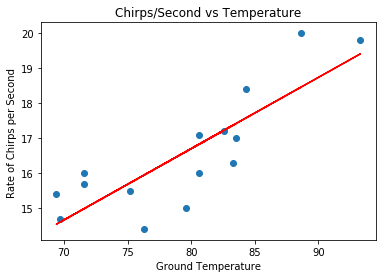

In [59]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.title('Chirps/Second vs Temperature')
plt.ylabel('Rate of Chirps per Second ')
plt.xlabel('Ground Temperature')
plt.show()

# Task 3

In [60]:
print("Score : ",model.score(x,y))

Score :  0.6922946529147


# Task 4

In [61]:
print('Rate of chirps/sec at ground temperature 95ºF :',model.predict([[95]]))

Rate of chirps/sec at ground temperature 95ºF : [19.74428913]


# Task 5

In [62]:
print('Ground temperature when the rate of chirps/sec is 18 :',(18 - model.intercept_)/model.coef_)

Ground temperature when the rate of chirps/sec is 18 : [86.40743135]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [44]:
df1 = pd.read_fwf("brain_body.txt")

In [63]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [67]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


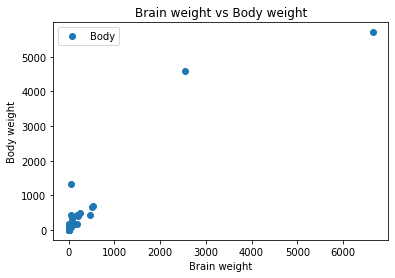

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [68]:
df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()
df1.corr()

We witness a couple of outliers

In [75]:
brain_percent_25 = df1['Brain'].quantile(0.25)
brain_percent_75 = df1['Brain'].quantile(0.75)
print(brain_percent_25,brain_percent_75)

0.6000000000000001 48.2025


In [76]:
iqr = brain_percent_75 - brain_percent_25
upper_limit = brain_percent_75 + iqr * 1.5
lower_limit = brain_percent_25 - iqr * 1.5
print(upper_limit,lower_limit)

119.60625 -70.80375000000001


In [78]:
df1['Brain'].loc[df1['Brain'] > upper_limit] = upper_limit

In [79]:
df1[df1['Brain'] == upper_limit]

,Brain,Body
3,119.60625,423.0
18,119.60625,4603.0
20,119.60625,419.0
21,119.60625,655.0
27,119.60625,680.0
28,119.60625,406.0
32,119.60625,5712.0
41,119.60625,490.0
55,119.60625,180.0
57,119.60625,169.0


In [80]:
body_percent_25 = df1['Body'].quantile(0.25)
body_percent_75 = df1['Body'].quantile(0.75)
print(body_percent_25,body_percent_75)

4.25 166.0


In [81]:
iqr = body_percent_75 - body_percent_25
upper_limit = body_percent_75 + iqr * 1.5
lower_limit = body_percent_25 - iqr * 1.5
print(upper_limit,lower_limit)

408.625 -238.375


In [83]:
 df1['Body'].loc[df1['Body'] > upper_limit] = upper_limit

In [84]:
df1[df1['Body'] == upper_limit]

,Brain,Body
3,119.60625,408.625
18,119.60625,408.625
20,119.60625,408.625
21,119.60625,408.625
27,119.60625,408.625
31,62.00000,408.625
32,119.60625,408.625
41,119.60625,408.625
45,52.16000,408.625


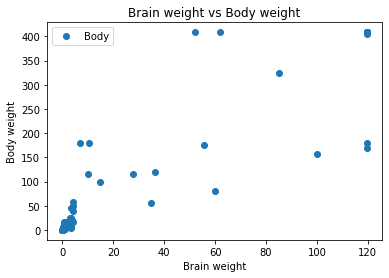

In [85]:
df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [86]:
df1.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [87]:
x = df1.iloc[: , [0]]
y = df1.iloc[: , 1]

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [89]:
x_train.shape, x_test.shape

((49, 1), (13, 1))

# Task 1

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print("Coefficient : ",model.coef_,"\nIntercept : ",model.intercept_)

Coefficient :  [2.84703556] 
Intercept :  22.08718812307353


In [91]:
print(f"Equation : y = {model.coef_} * x + {model.intercept_}")


Equation : y = [2.84703556] * x + 22.08718812307353


# Task 2

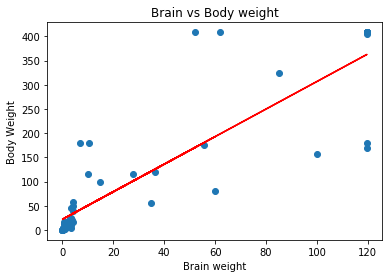

In [92]:
plt.scatter(x, y)
plt.plot(x_test,model.predict(x_test),color='red')
plt.title('Brain vs Body weight')
plt.xlabel('Brain weight')
plt.ylabel('Body Weight')
plt.show()

# Task 3

In [94]:
print('Score :',model.score(x_test,y_test))

Score : 0.6979206124225579


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [97]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [98]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [101]:
df2.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


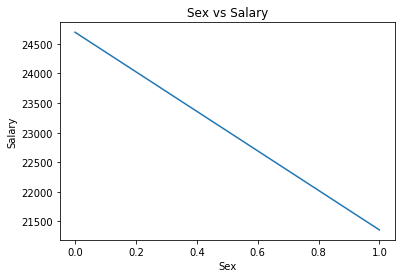

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [102]:
df2.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Sex','Salary']].corr()

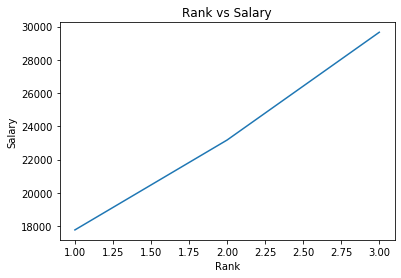

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [103]:
df2.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Rank','Salary']].corr()

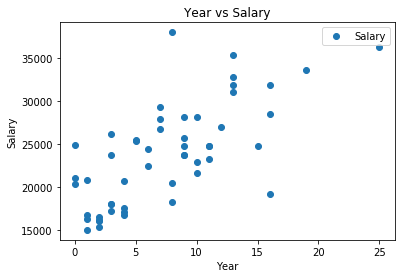

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [104]:
df2.plot(x = 'Year', y = 'Salary',style = 'o')
plt.title('Year vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Year','Salary']].corr()

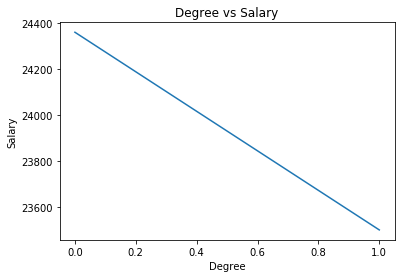

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [105]:
df2.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['Degree','Salary']].corr()

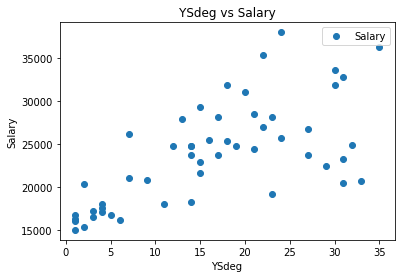

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [106]:
df2.plot(x = 'YSdeg', y = 'Salary',style = 'o')
plt.title('YSdeg vs Salary')
plt.ylabel('Salary')
plt.show()
df2[['YSdeg','Salary']].corr()

In [107]:
x = df2.iloc[: , :-1]
y = df2.iloc[: , -1]

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [109]:
x_train.shape, x_test.shape

((39, 5), (13, 5))

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Task 1

In [111]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
print("Intercept :",model.intercept_)

Intercept : 23673.761507150975


In [113]:
pd.DataFrame(model.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ['Coefficients'])

,Coefficients
Sex,445.200148
Rank,4600.927697
Year,2388.759570
Degree,130.872715
YSdeg,-462.316963


In [114]:
model.score(x_test,y_test)

0.6795042183867231

In [115]:
print("Equation : y =",end ='')
for i in range(0,5):
   print(f"({model.coef_[i]}) * x{i+1} + ", end = '')
print(model.intercept_)

Equation : y =(445.20014816601787) * x1 + (4600.927696994698) * x2 + (2388.7595698721793) * x3 + (130.87271473279034) * x4 + (-462.31696297476685) * x5 + 23673.761507150975


# Task 2

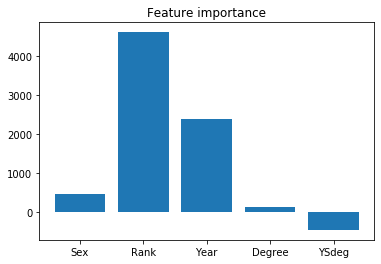

,Coefficients
Sex,445.200148
Rank,4600.927697
Year,2388.759570
Degree,130.872715
YSdeg,-462.316963


In [116]:
importance = model.coef_
plt.bar(x = ["Sex", "Rank", "Year", "Degree", "YSdeg"] , height = importance)
plt.title('Feature importance')
plt.show()
pd.DataFrame(model.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ['Coefficients'])

In [117]:
from itertools import combinations

cols = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
combos = list(combinations(cols,x+1) for x in range(len(cols)))

In [118]:
score_dict = {}
for i in range(len(combos)):
  for j in combos[i]:
    x = df2[list(j)]
    y = df2['Salary']
    LR = LinearRegression()
    LR.fit(x,y)
    score_dict[j] = LR.score(x,y)

In [119]:
sorted(score_dict.items(), key = lambda i:i [1], reverse = True)

[(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.8547180674410969),
 (('Sex', 'Rank', 'Year', 'YSdeg'), 0.849036619226285),
 (('Rank', 'Year', 'Degree', 'YSdeg'), 0.8485077204335426),
 (('Rank', 'Year', 'YSdeg'), 0.8456725764485596),
 (('Sex', 'Rank', 'Year', 'Degree'), 0.845547641297936),
 (('Sex', 'Rank', 'Year'), 0.8454319861987166),
 (('Rank', 'Year', 'Degree'), 0.8437395200874137),
 (('Rank', 'Year'), 0.8436480933264598),
 (('Sex', 'Rank', 'Degree', 'YSdeg'), 0.7671813414350668),
 (('Sex', 'Rank', 'YSdeg'), 0.7666122610227071),
 (('Rank', 'Degree', 'YSdeg'), 0.7625149185326454),
 (('Rank', 'YSdeg'), 0.7623948189698249),
 (('Sex', 'Rank', 'Degree'), 0.7583144768153612),
 (('Rank', 'Degree'), 0.7557961688386643),
 (('Sex', 'Rank'), 0.7554917749443394),
 (('Rank',), 0.7525360539274634),
 (('Sex', 'Year', 'Degree', 'YSdeg'), 0.6311597502907434),
 (('Year', 'Degree', 'YSdeg'), 0.6236261611533505),
 (('Sex', 'Degree', 'YSdeg'), 0.5832708257660315),
 (('Sex', 'Year', 'YSdeg'), 0.580806391

From the above R2 scores of all the combinations, we conclude that the combination ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] has the highest R2 score of 0.8547180674410969

# Task 3

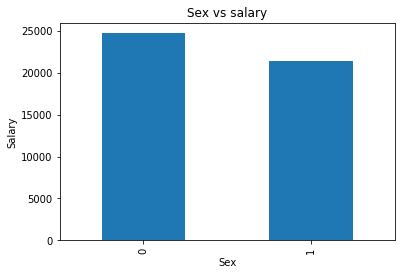

In [121]:
df2.groupby('Sex')['Salary'].mean().plot(kind='bar')
plt.ylabel('Salary')
plt.title('Sex vs salary')
plt.show()

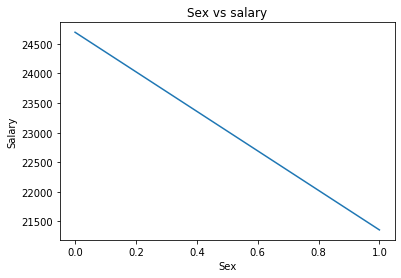

In [122]:
df2.groupby('Sex')['Salary'].mean().plot()
plt.ylabel('Salary')
plt.title('Sex vs salary')
plt.show()

In [123]:
df2[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


From the combinations of R2 score,

[ 'Sex', 'Rank', 'Year', 'Degree', 'YSdeg' ] : 0.8547180674410969

[ 'Rank', 'Year', 'Degree', 'YSdeg' ] : 0.8485077204335426

It doesn't have much difference in R2 score when the sex column is dropped in the model.

[ 'Sex' ] : 0.06389892583288004

The model with sex column has a very low R2 score

From the above consideration, we can conclude that there is less salary discrimination by sex